## IMPORT LIBRARIES

In [2]:
#!pip install -U seaborn

In [1]:
# data manipulation
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#df = pd.read_csv("/ALY6040/Womens Clothing E-Commerce Reviews.csv",index_col=False)
#df = df.reset_index(drop=True)
#df_org = df.copy()  ### This is just to retrive original dataframe incase we need.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Emperor0819/Datasets/main/csv/Womens%20Clothing%20E-Commerce%20Reviews.csv",index_col=False)
df = df.reset_index(drop=True)
df_org = df.copy()  ### This is just to retrive original dataframe incase we need.

In [5]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


#1 - DATA EXPLORATION

In [6]:
df = df.drop(['Unnamed: 0'], axis=1, errors='ignore') # drop the 'Unnamed: 0' column

df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
# Dimension of the dataset
# Column names
# Information about data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [8]:
# Check for missing values
print(df.isnull().sum())

# To review - "Title, Review Text, Division Name, Department Name, Class Name"

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [9]:
# Summary statistics for numerical columns
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [10]:
# checking value counts for Recommended IND
print(df["Recommended IND"].value_counts())

# percentage of Recommended IND
print((df["Recommended IND"].value_counts()/ len(df)) *100)

1    19314
0     4172
Name: Recommended IND, dtype: int64
1    82.236226
0    17.763774
Name: Recommended IND, dtype: float64


# 1.1 - Data Visualization

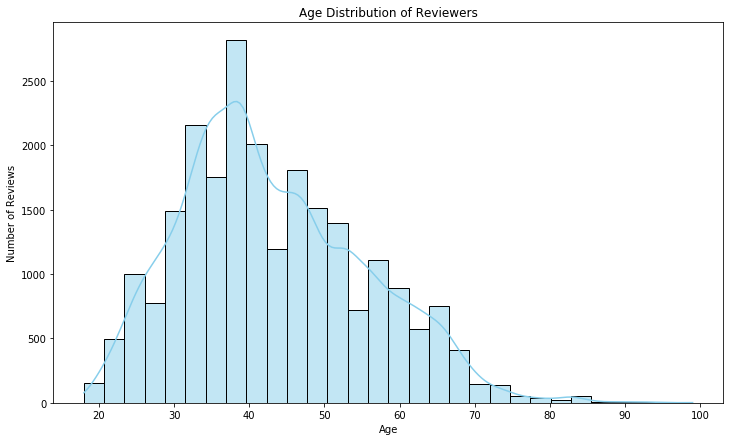

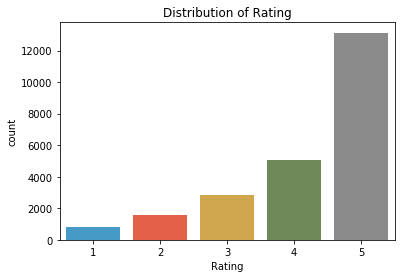

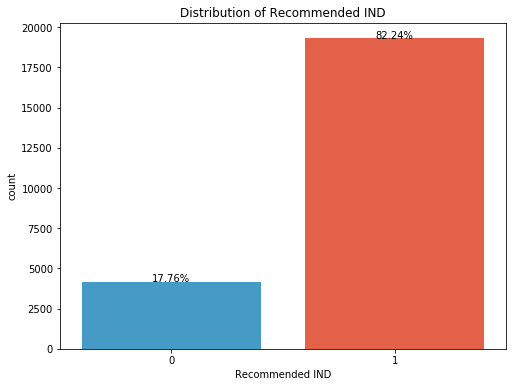

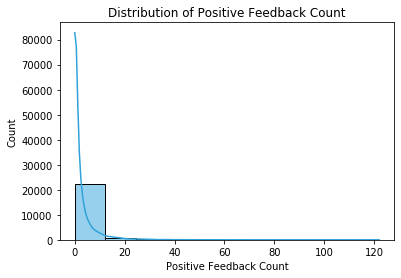

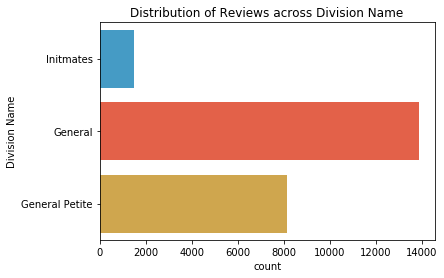

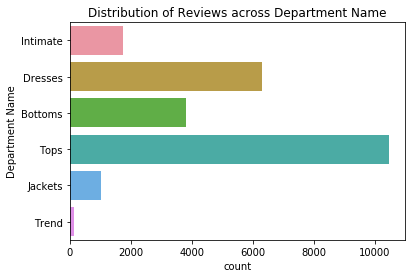

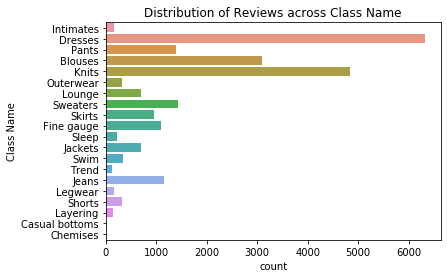

In [11]:
# Distribution of 'Age'
plt.figure(figsize=(12, 7))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Reviewers')
plt.xlabel('Age')
plt.ylabel('Number of Reviews')
plt.show()

# Distribution of 'Rating'
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Rating')
plt.show()

# Distribution of 'Recommended IND'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Recommended IND', data=df)
plt.title('Distribution of Recommended IND')

# Calculate the percentage and annotate the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format(100 * height / total),
            ha="center")

plt.show()

# Distribution of 'Positive Feedback Count'
sns.histplot(df['Positive Feedback Count'], bins=10, kde=True)
plt.title('Distribution of Positive Feedback Count')
plt.show()

# Distribution of reviews across 'Division Name'
sns.countplot(y='Division Name', data=df)
plt.title('Distribution of Reviews across Division Name')
plt.show()

# Distribution of reviews across 'Department Name'
sns.countplot(y='Department Name', data=df)
plt.title('Distribution of Reviews across Department Name')
plt.show()

# Distribution of reviews across 'Class Name'
sns.countplot(y='Class Name', data=df)
plt.title('Distribution of Reviews across Class Name')
plt.show()

#2) DATA CLEANING STATUS

In [12]:
# Display unique values from 'Division Name'
print("Unique values in 'Division Name':", df['Division Name'].unique())

# Display unique values from 'Department Name'
print("Unique values in 'Department Name':", df['Department Name'].unique())

# Display unique values from 'Class Name'
print("Unique values in 'Class Name':", df['Class Name'].unique())


Unique values in 'Division Name': ['Initmates' 'General' 'General Petite' nan]
Unique values in 'Department Name': ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
Unique values in 'Class Name': ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises']


In [13]:
# THERE ARE 14 OBSERVATIONS WITH 'DIVISION NAME' NULL
# NEED TO DISCUSS WHETHER TO DROP OR INCLUDE TO PREDICT

# Drop rows where 'Division Name' is null
df.dropna(subset=['Division Name'], inplace=True)

# Display the cleaned DataFrame
print(df.isnull().sum())


Clothing ID                   0
Age                           0
Title                      3809
Review Text                 844
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64


In [14]:
# Get the rows where 'Title' is null/ NaN
df[df['Title'].isnull()]

# Fill missing values in 'Title' with 'Unknown'
# We don't have to drop null Title, since our interest is on Review Text
df['Title'].fillna('Unknown', inplace=True)


In [15]:
# Get the rows where 'Title' is null/ NaN
df[df['Review Text'].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,861,23,Unknown,NaN,5,1,0,General Petite,Tops,Knits
93,1081,31,Unknown,NaN,5,1,0,General,Dresses,Dresses
98,1133,50,Unknown,NaN,5,1,0,General,Jackets,Outerwear
135,861,35,Unknown,NaN,4,1,0,General Petite,Tops,Knits
142,1126,35,Unknown,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...,...
23258,862,35,Unknown,NaN,4,1,0,General,Tops,Knits
23301,862,52,Unknown,NaN,5,1,0,General,Tops,Knits
23303,823,46,Unknown,NaN,5,1,0,General,Tops,Blouses
23470,1104,39,Unknown,NaN,5,1,0,General Petite,Dresses,Dresses


In [16]:
print(f"Percentage of null/ Nan 'Review Text': {len(df[df['Review Text'].isnull()]) / len(df) * 100}")

Percentage of null/ Nan 'Review Text': 3.5957736877982276


In [17]:
# Since it's less than 4% and Review Text must not be empty for our case
df.dropna(subset=['Review Text'], inplace=True)

# Display the cleaned DataFrame (optional)
print(df.isnull().sum())


Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


In [18]:
# Classify age group based on Standard Age Group
# Define a function to classify age
def classify_age(age):
    if age <= 12:
        return 'Child'
    elif age <= 19:
        return 'Teen'
    elif age <= 34:
        return 'Young Adult'
    elif age <= 64:
        return 'Adult'
    else:
        return 'Senior'

# Apply the function to the 'Age' column to create the 'Age Group' column
df['Age Group'] = df['Age'].apply(classify_age)

In [19]:
# Review the dataset
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
0,767,33,Unknown,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Young Adult
1,1080,34,Unknown,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Young Adult
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Adult
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Adult
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Adult


In [20]:
df["Recommended IND"].unique()

array([1, 0], dtype=int64)

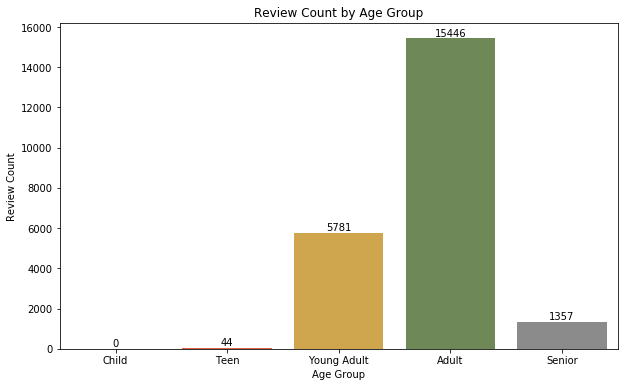

In [21]:
# Create a bar chart for 'Age Group'
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age Group', data=df, order=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
plt.title('Review Count by Age Group')
plt.ylabel('Review Count')
plt.xlabel('Age Group')

# Add count labels on each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

#3)MISSING DATA / DATA SHAPE / DATA DUPLICATION

In [22]:
## checking shape of data and null value.
print("shape of data")
print(df.shape)
print("\n")
print("Number of null values in each column\n")
print(df.isnull().sum())

## checking % of null values overall.
### Age has 16% revenue hence we need to figure it out way to replace those values.
print("\n% of null values\n")
print((df.isnull().sum()/23468)*100)

##### Age has 16% revenue hence we need to figure it out way to replace those values.

## we can use title generator from review text and can set title for null values in title column.
## we can drop remainning 3% of null review columns values.

shape of data
(22628, 11)


Number of null values in each column

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Age Group                  0
dtype: int64

% of null values

Clothing ID                0.0
Age                        0.0
Title                      0.0
Review Text                0.0
Rating                     0.0
Recommended IND            0.0
Positive Feedback Count    0.0
Division Name              0.0
Department Name            0.0
Class Name                 0.0
Age Group                  0.0
dtype: float64


In [23]:
## checking for duplicate values
df2 = df.drop_duplicates()
print(df.shape)  ## we don't have any duplicates values in dataset.
df = df2.copy()

(22628, 11)


#4) OUTLIERS AND SUSPICIOUS DATA




Standardized DataFrame:
        Age    Rating  Positive Feedback Count
0 -0.834105 -0.164040                -0.454746
1 -0.752991  0.732080                 0.236384
2  1.355965 -1.060159                -0.454746
3  0.544828  0.732080                -0.454746

Normalized data with outliers. we can clearly see that positive feedback count and age has most of outliers




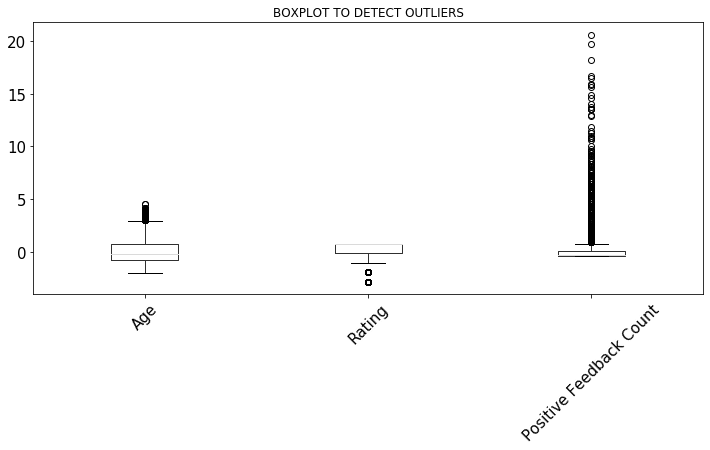

In [24]:
cr = df[["Age","Rating","Positive Feedback Count"]]
df2 = cr.copy()
## checking outliers
# Function to standardize a single column using Z-score scaling
def standardize_column(column):
    mean_val = cr[column].mean()
    std_val = cr[column].std()
    cr[column] = (cr[column] - mean_val) / std_val

# Standardize the DataFrame
## we are doint this to check presence of outliers at once in all the major columns using box plots.
for column in cr.columns:
    standardize_column(column)


print("\n\n\nStandardized DataFrame:")
df_std = cr.copy()
print(df_std.head(4))

print("\nNormalized data with outliers. we can clearly see that positive feedback count and age has most of outliers\n\n")
boxprops = dict(linestyle='-', linewidth=1, color='blue')
df_std.boxplot(grid=False, rot=45, fontsize=15,figsize=(12,5),boxprops=boxprops)
title_boxplot = 'BOXPLOT TO DETECT OUTLIERS'
plt.title( title_boxplot )
plt.show()

## we can clearly see that positive feedback and age has most outliers.

#5) HOW WE CLEANED OUR DATA.

In [25]:
## removing outliers.

def remove_outliers_iqr(df):
    """
    Remove outliers from all columns in a DataFrame using the interquartile range (IQR) method.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: A DataFrame with outliers removed.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Calculate the IQR for each column
    IQR = Q3 - Q1

    # Create a boolean mask to identify outliers
    outlier_mask = ((df < (Q1 - 8 * IQR)) | (df > (Q3 + 8 * IQR)))

    # Remove outliers by setting them to NaN
    df_no_outliers = df.mask(outlier_mask)



    return df_no_outliers
### FUNCTION END ##
## testing function
cleaned_data = remove_outliers_iqr(df = df2)
cleaned_data_normal = cleaned_data.copy()
cleaned_data_normal.head()

,Age,Rating,Positive Feedback Count
0,33,4,0.0
1,34,5,4.0
2,60,3,0.0
3,50,5,0.0
4,47,5,6.0


Standardized DataFrame:

normalized data without any outliers


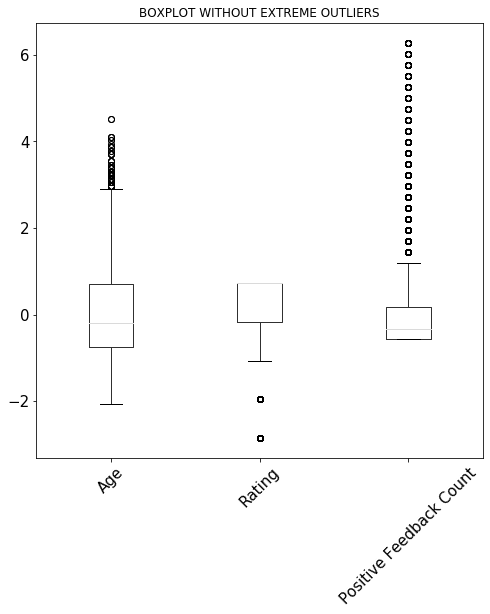

In [26]:
## standardizing columns. and presenting cleaned data.
# Function to standardize a single column using Z-score scaling
def standardize_column(column):
    mean_val = cleaned_data[column].mean()
    std_val = cleaned_data[column].std()
    cleaned_data[column] = (cleaned_data[column] - mean_val) / std_val

# Standardize the DataFrame
for column in cleaned_data.columns:
    standardize_column(column)


print("Standardized DataFrame:")
cleaned_data = cleaned_data.copy()
cleaned_data.head()



## printing box plot of cleaned data.
print("\nnormalized data without any outliers")
cleaned_data.boxplot(grid=False, rot=45, fontsize=15,figsize=(8,8))
title_boxplot = 'BOXPLOT WITHOUT EXTREME OUTLIERS'
plt.title( title_boxplot )
plt.show()


## PLEASE NOTE WE HAVE NOT DROPPED ALL THE OUTLIERS BECAUSE REMANING WERE USEFUL FOR OUR FURTHER ANALYSIS
## FORMULA FOR REMOVING OUTLIERS HAVE BEEN MODIFIED ACCORDING TO THE NEED OF ANALYSIS  outlier_mask = ((df < (Q1 - 8 * IQR)) | (df > (Q3 + 8 * IQR)))

In [27]:
print(df["Rating"].value_counts())
cleaned_data_normal["Rating"].value_counts()

## we are keeping all the columns same except Positive Feedback Count.

5    12526
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64


5    12526
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [28]:
## original data vs cleaned data.
print("original data with outliers")
print(df2.describe())
print("\n")
print("cleaned data without outliers")
print(cleaned_data_normal.describe())

original data with outliers
                Age        Rating  Positive Feedback Count
count  22627.000000  22627.000000             22627.000000
mean      43.283157      4.183056                 2.631900
std       12.328378      1.115923                 5.787621
min       18.000000      1.000000                 0.000000
25%       34.000000      4.000000                 0.000000
50%       41.000000      5.000000                 1.000000
75%       52.000000      5.000000                 3.000000
max       99.000000      5.000000               122.000000


cleaned data without outliers
                Age        Rating  Positive Feedback Count
count  22627.000000  22627.000000             22416.000000
mean      43.283157      4.183056                 2.256602
std       12.328378      1.115923                 3.943116
min       18.000000      1.000000                 0.000000
25%       34.000000      4.000000                 0.000000
50%       41.000000      5.000000                 1.000

In [29]:
## finally removing outliers from main data above steps was to understand data better and the cleaning process.   .
df_cleaned = remove_outliers_iqr(df = df)
df_cleaned['Recommended IND'] = df_cleaned['Recommended IND'].fillna(0)
df_cleaned.head()


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
0,767,33,Unknown,Absolutely wonderful - silky and sexy and comf...,4,1.0,0.0,Initmates,Intimate,Intimates,Young Adult
1,1080,34,Unknown,Love this dress! it's sooo pretty. i happene...,5,1.0,4.0,General,Dresses,Dresses,Young Adult
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0.0,0.0,General,Dresses,Dresses,Adult
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1.0,0.0,General Petite,Bottoms,Pants,Adult
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1.0,6.0,General,Tops,Blouses,Adult


In [30]:
df_cleaned.shape

(22627, 11)

In [31]:
print(df["Positive Feedback Count"].describe())
print("\n")
print(df_cleaned["Positive Feedback Count"].describe())

count    22627.000000
mean         2.631900
std          5.787621
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64


count    22416.000000
mean         2.256602
std          3.943116
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         27.000000
Name: Positive Feedback Count, dtype: float64


In [32]:
## df_cleaned is dataframe created which is ready for use of EDA.
df_cleaned.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
0,767,33,Unknown,Absolutely wonderful - silky and sexy and comf...,4,1.0,0.0,Initmates,Intimate,Intimates,Young Adult
1,1080,34,Unknown,Love this dress! it's sooo pretty. i happene...,5,1.0,4.0,General,Dresses,Dresses,Young Adult
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0.0,0.0,General,Dresses,Dresses,Adult
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1.0,0.0,General Petite,Bottoms,Pants,Adult
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1.0,6.0,General,Tops,Blouses,Adult


###Please use df_cleaned from this point forward
###df_org: Original copy of dataframe
####1st Checkpoint > df: Dataframe for data exploration, before cleaning
####2nd Checkpoint > df_cleaned: Claned dataframe before handling data duplication





#6)EDA ON DATA FINDING 1

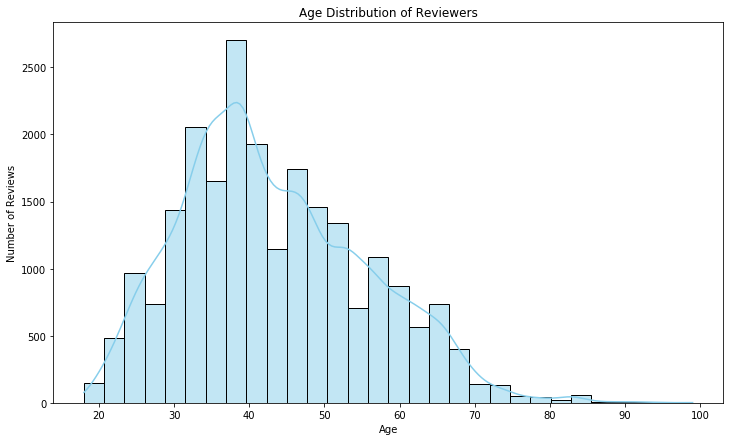

In [33]:
# Distribution of 'Age'
plt.figure(figsize=(12, 7))
sns.histplot(df_cleaned['Age'], bins=30, color='skyblue', kde=True)
plt.title('Age Distribution of Reviewers')
plt.xlabel('Age')
plt.ylabel('Number of Reviews')
plt.show()

#7) EDA ON DATA FINDING 2

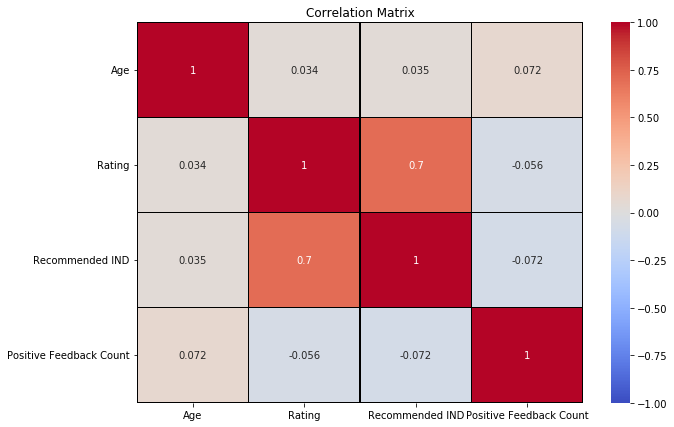

In [34]:
# Calculating the correlation matrix including 'Recommended IND'
correlation_matrix = df_cleaned[['Age', 'Rating', 'Recommended IND','Positive Feedback Count']].corr(method='spearman')

# Setting the figure size
plt.figure(figsize=(10, 7))

# Visualizing the correlation matrix using a heatmap with black lines
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            linewidths=0.5, linecolor='black')

# Setting the title for the heatmap
plt.title('Correlation Matrix')

# Displaying the heatmap
plt.show()




#8) EDA ON DATA FINDING 3

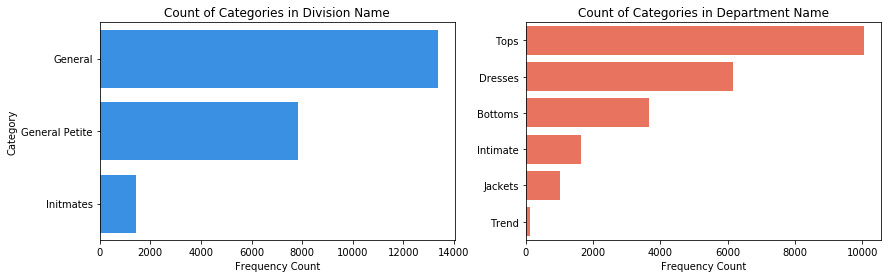

In [35]:


#Plot Division Name and Department Name Distribution:

row_plots = ["Division Name", "Department Name"]
f, axes = plt.subplots(1, len(row_plots), figsize=(14, 4), sharex=False)

colors = ["dodgerblue", "tomato"]

for i, x in enumerate(row_plots):
    sns.countplot(y=x, data=df_cleaned, order=df_cleaned[x].value_counts().index, ax=axes[i], color=colors[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
    axes[i].set_ylabel("Category")

axes[1].set_ylabel("")
plt.show()

#9) EDA ON DATA FINDING 4

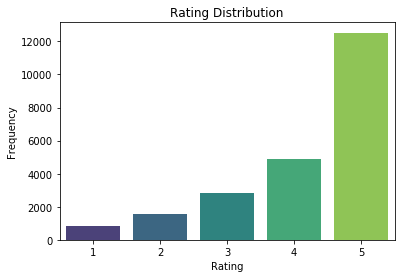

In [36]:
#Distribution of Rating

sns.countplot(data=df_cleaned, x='Rating', palette='viridis')

plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Rating Distribution")


plt.show()

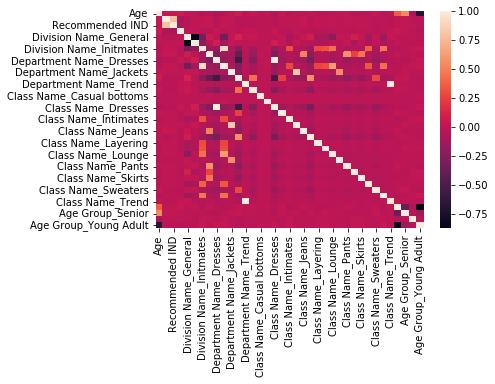

In [60]:
df_cleaned.head()
df_new = df_cleaned[["Age","Rating","Recommended IND","Positive Feedback Count","Division Name","Department Name","Class Name","Age Group"]]

df_new_2 = pd.get_dummies(data = df_new)
df_new_2.head()

#df_new_2.corr() 
dataplot = sns.heatmap(df_new_2.corr())
plt.show()

## Modelling 

In [61]:
df_cleaned.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
0,767,33,Unknown,Absolutely wonderful - silky and sexy and comf...,4,1.0,0.0,Initmates,Intimate,Intimates,Young Adult
1,1080,34,Unknown,Love this dress! it's sooo pretty. i happene...,5,1.0,4.0,General,Dresses,Dresses,Young Adult
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0.0,0.0,General,Dresses,Dresses,Adult
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1.0,0.0,General Petite,Bottoms,Pants,Adult
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1.0,6.0,General,Tops,Blouses,Adult


In [143]:
df_new = df_cleaned[["Age","Rating","Positive Feedback Count","Division Name","Department Name","Class Name","Age Group","Recommended IND"]]

In [144]:
df_new.head()

,Age,Rating,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group,Recommended IND
0,33,4,0.0,Initmates,Intimate,Intimates,Young Adult,1.0
1,34,5,4.0,General,Dresses,Dresses,Young Adult,1.0
2,60,3,0.0,General,Dresses,Dresses,Adult,0.0
3,50,5,0.0,General Petite,Bottoms,Pants,Adult,1.0
4,47,5,6.0,General,Tops,Blouses,Adult,1.0


In [119]:
#print(df_new["Recommended IND"].unique())
#print(df_new["Positive Feedback Count"].unique())
print(df_new["Recommended IND"].value_counts())

1.0    18526
0.0     4101
Name: Recommended IND, dtype: int64


In [120]:
df_new.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,22627.000000,22627.000000,22627.000000,22416.000000
mean,43.283157,4.183056,0.818756,2.256602
std,12.328378,1.115923,0.385228,3.943116
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,27.000000


In [121]:
df_new_2 = pd.get_dummies(data = df_new)
df_new_2.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,...,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Age Group_Adult,Age Group_Senior,Age Group_Teen,Age Group_Young Adult
0,33,4,1.0,0.0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,34,5,1.0,4.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,60,3,0.0,0.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,50,5,1.0,0.0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,47,5,1.0,6.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


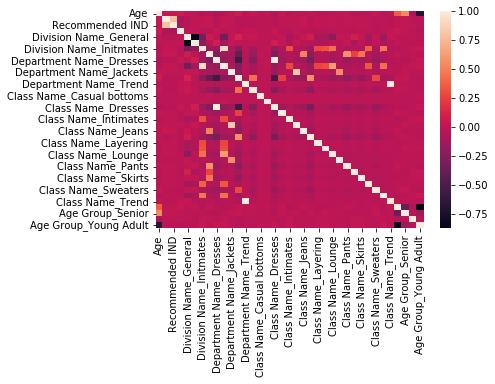

In [122]:
#df_new_2.corr() 
dataplot = sns.heatmap(df_new_2.corr())
plt.show()

In [123]:
df_new_2.columns

Index(['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count',
       'Division Name_General', 'Division Name_General Petite',
       'Division Name_Initmates', 'Department Name_Bottoms',
       'Department Name_Dresses', 'Department Name_Intimate',
       'Department Name_Jackets', 'Department Name_Tops',
       'Department Name_Trend', 'Class Name_Blouses',
       'Class Name_Casual bottoms', 'Class Name_Chemises',
       'Class Name_Dresses', 'Class Name_Fine gauge', 'Class Name_Intimates',
       'Class Name_Jackets', 'Class Name_Jeans', 'Class Name_Knits',
       'Class Name_Layering', 'Class Name_Legwear', 'Class Name_Lounge',
       'Class Name_Outerwear', 'Class Name_Pants', 'Class Name_Shorts',
       'Class Name_Skirts', 'Class Name_Sleep', 'Class Name_Sweaters',
       'Class Name_Swim', 'Class Name_Trend', 'Age Group_Adult',
       'Age Group_Senior', 'Age Group_Teen', 'Age Group_Young Adult'],
      dtype='object')

In [132]:
df_new_2["Positive Feedback Count"].fillna(0, inplace = True)
#df_new_2.isnull().sum()

In [133]:
X = df_new_2.drop("Recommended IND", axis='columns')
y = df["Recommended IND"]
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

Index(['Age', 'Rating', 'Positive Feedback Count', 'Division Name_General',
       'Division Name_General Petite', 'Division Name_Initmates',
       'Department Name_Bottoms', 'Department Name_Dresses',
       'Department Name_Intimate', 'Department Name_Jackets',
       'Department Name_Tops', 'Department Name_Trend', 'Class Name_Blouses',
       'Class Name_Casual bottoms', 'Class Name_Chemises',
       'Class Name_Dresses', 'Class Name_Fine gauge', 'Class Name_Intimates',
       'Class Name_Jackets', 'Class Name_Jeans', 'Class Name_Knits',
       'Class Name_Layering', 'Class Name_Legwear', 'Class Name_Lounge',
       'Class Name_Outerwear', 'Class Name_Pants', 'Class Name_Shorts',
       'Class Name_Skirts', 'Class Name_Sleep', 'Class Name_Sweaters',
       'Class Name_Swim', 'Class Name_Trend', 'Age Group_Adult',
       'Age Group_Senior', 'Age Group_Teen', 'Age Group_Young Adult'],
      dtype='object')


In [134]:
X_train.head()

,Age,Rating,Positive Feedback Count,Division Name_General,Division Name_General Petite,Division Name_Initmates,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,...,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Age Group_Adult,Age Group_Senior,Age Group_Teen,Age Group_Young Adult
19013,43,3,9.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
565,47,1,12.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
20013,34,3,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22215,42,5,2.0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
21805,37,3,0.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [135]:
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

1    0.816202
0    0.183798
Name: Recommended IND, dtype: float64
1    0.824716
0    0.175284
Name: Recommended IND, dtype: float64


In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay

# Decision Tree Classifier

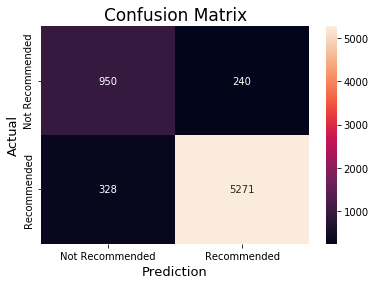

Accuracy   : 0.9163352481956105
Precision : 0.9564507348938487
Recall    : 0.941418110376853
F1-score  : 0.9488748874887488


In [137]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
y_pred_list = list(y_pred)
y_true_list = list(y_test)

cm = confusion_matrix(y_true_list,y_pred_list)

#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Not Recommended','Recommended'],
            yticklabels=['Not Recommended','Recommended'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

# Logitstic Regression

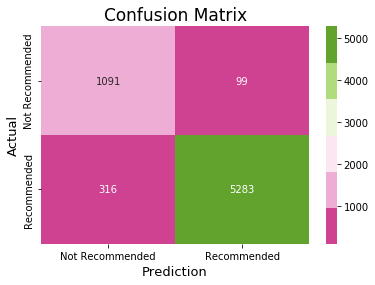

Accuracy   : 0.9388717042274267
Precision : 0.9816053511705686
Recall    : 0.9435613502411145
F1-score  : 0.962207449230489


In [138]:
lr= LogisticRegression(random_state=16)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
y_pred_list = list(y_pred)
y_true_list = list(y_test)

cm = confusion_matrix(y_true_list,y_pred_list)
colormap = sns.color_palette("PiYG") 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            cmap=colormap,
            fmt='g', 
            xticklabels=['Not Recommended','Recommended'],
            yticklabels=['Not Recommended','Recommended'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

# Support Vector Machine

Accuracy: 0.937398733244955


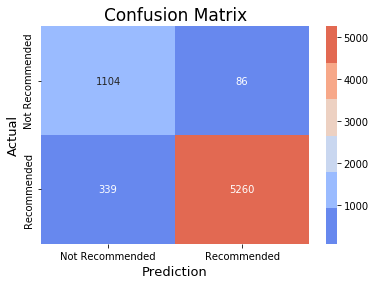

Accuracy   : 0.937398733244955
Precision : 0.9839132061354283
Recall    : 0.9394534738346133
F1-score  : 0.9611694837825491


In [139]:
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


y_pred_list = list(y_pred)
y_true_list = list(y_test)

cm = confusion_matrix(y_true_list,y_pred_list)
colormap = sns.color_palette("coolwarm") 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            cmap=colormap,
            fmt='g', 
            xticklabels=['Not Recommended','Recommended'],
            yticklabels=['Not Recommended','Recommended'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

# Naive Bayes

Accuracy: 0.392988658123435


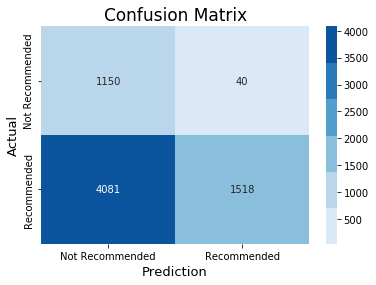

Accuracy   : 0.392988658123435
Precision : 0.9743260590500642
Recall    : 0.27111984282907664
F1-score  : 0.4242000838340087


In [140]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_pred_list = list(y_pred)
y_true_list = list(y_test)

cm = confusion_matrix(y_true_list,y_pred_list)
colormap = sns.color_palette("Blues") 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            cmap=colormap,
            fmt='g', 
            xticklabels=['Not Recommended','Recommended'],
            yticklabels=['Not Recommended','Recommended'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

## Random Forest Classification

Accuracy: 0.9263514508764177


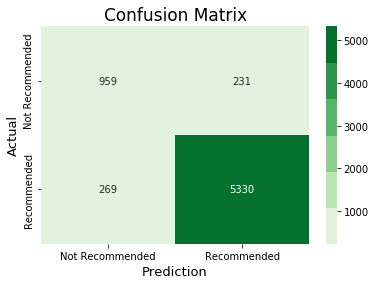

Accuracy   : 0.9263514508764177
Precision : 0.9584607085056644
Recall    : 0.9519557063761386
F1-score  : 0.9551971326164874


In [141]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



y_pred_list = list(y_pred)
y_true_list = list(y_test)

cm = confusion_matrix(y_true_list,y_pred_list)
colormap = sns.color_palette("Greens") 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            cmap=colormap,
            fmt='g', 
            xticklabels=['Not Recommended','Recommended'],
            yticklabels=['Not Recommended','Recommended'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

In [55]:
df_cleaned.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group
0,767,33,Unknown,Absolutely wonderful - silky and sexy and comf...,4,1.0,0.0,Initmates,Intimate,Intimates,Young Adult
1,1080,34,Unknown,Love this dress! it's sooo pretty. i happene...,5,1.0,4.0,General,Dresses,Dresses,Young Adult
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0.0,0.0,General,Dresses,Dresses,Adult
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1.0,0.0,General Petite,Bottoms,Pants,Adult
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1.0,6.0,General,Tops,Blouses,Adult


In [56]:
df_cleaned.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,22627.000000,22627.000000,22627.000000,22627.000000,22416.000000
mean,919.691386,43.283157,4.183056,0.818756,2.256602
std,201.687114,12.328378,1.115923,0.385228,3.943116
min,1.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,27.000000


## Working with Text 
###### Now that a general understanding of the variables have been laid out, I will begin to analysis the customer reviews.

### 1.0 Text Pe-Processing

In [57]:
pd.set_option('max_colwidth', 500)
df_cleaned[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
12757,"Beautiful, but need to right sizing","This top is very feminie, i love hte pelats and flower details. it can be, however, a bit boxy, i think if you have wider hips, i might avoid. great to go with skinny pants/ejans, though. could size down, if shoulders are not too wide...",4
14930,Fits well,"I'm 5'7, 125lbs, and the small fits perfectly. the sleeves are the right length (i have long arms and legs), and the body fits loosely, without looking sloppy. at my height, the small is not long enough to wear as a tunic, which is fine.\r\n\r\nunfortunately, the shirt arrived with makeup stains around the laces and the inside of the shirt, so i had to wash it before wearing it.\r\n\r\ni only purchased this shirt because it was on sale.",3
9333,Beautiful,This top is just a beautiful as in the picture. it runs true to size and has a beautiful flattering shape on. it looks great with jeans and sandals for a casual look but can easily be dresss up too. i'm 5'3 so sometimes i need petite sizing but i liked the length of the regular fit with this top. first time i wore it i received tons of compliments.,5
13649,"Gorgeous, flattering dress","This dress is soft, comfortable, beautiful and drapes so nicely - not tent-like at all. i wasn't sure about sizing, and went with some reviewers who recommended sizing down, but the small in the strap/underarm area so i am exchanging for my usual medium. as another reviewer noted, you cannot adjust the straps, they are stitched together not tied together. i considered having it altered but was assured there are plenty in stock. i cannot wait for it to arrive! perfect for summer, or fall with...",5
18263,Beautiful top,"I love this top! it flows nicely and fits perfectly. i'm 5' 4 1/2"", 125 lbs. and ordered the small. i love the little bit of sparkle in the blouse, too.",5
1940,Wanted to like it,"I thought this dress was very cute on the model, however it was way too tight across the chest for me. going up a size would mean it would be too roomy everywhere else. also, fabric wasn't great.",3
21140,Unknown,"Is it just me? i love these pants i bought them in 2 sizes. first my normal size and then down one size because although they fit perfect in the store, with in a hour of wearing them around the house, they had stretched out so much that i could not keep them up. so i purchased the smaller size (same color) and they stretched out just like the first pair. so disappointing. i took them to my seamstress and she took them in 2 inches in the waist and now at least i can wear them all day. not sur...",4


In [58]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

**Code Explanation:**

This chunk of code creates a function that takes each review and combines them into one seamless text. It then applies lowercase, tokenizer, removes stopwords and punctuation, and finally uses the PorterStemmer.

**Interpretation:**
In order to process the data set's centerpiece, the review body, I utilized the NLTK package to lowercase, tokenize, and 
remove stopwords and punctuation. Tokenizing treats each word as its own value, while the other steps gets rid of the 
noise and irrelevant symbols in the data, standardizing the reviews for analysis. Upon reviewing the performance of text
analysis, I decided to implement the Porter Stemmer on the tokens in order to combine words with tense and plurality 
deviance. I contemplated exploring the use of sequential models, such as Long Short-term memory, which would benefit 
from stop words, but unfortunately I could only find predictive applications of it, no insight extracting aspects.

The last piece of data transformation conducted was to bin the continuous variable age into a categorical variable:
age category.



**5.2 Sentiment Analysis**
My first attempt at understanding the customer reviews is to see how the textual sentiment relates to the rating scores. With this method, it will be possible to distinguish outright positive and negative comments from the constructive variant.

I will also explore the interaction between sentiment score:

Raiting

Recommended

Positive Feedback Count

In [59]:
df = df_cleaned.copy()

In [60]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shreyansh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [61]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df["Review Text"]= df["Review Text"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

**Code Explanation:**

Pre-processing chunk loads the NLTK Sentiment Intensity Analyzer module, selects desired variables, and finally applies lowercasing to the column of reviews in the dataframe. The second paragraph of code Applying Model and Variable Creation classifies each review in the dataset on three dimensions: Positive, Neutral, and Negative. These results are stored in three respective columns. The overall sentiment is then determined and stored in the Sentiment column.

Neutral/Negative/Positive Score: Indicates the potency of these classes between 0 and 1. Onl
Polarity Score: Measures the difference between the Positive/Neutral/Negative values, where a positive numbers closer to 1 indicates overwhelming positivity, and a negative number closer to -1 indicates overwhelming negativity.
Normalize Plots for Sentiment Distribution

In [62]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

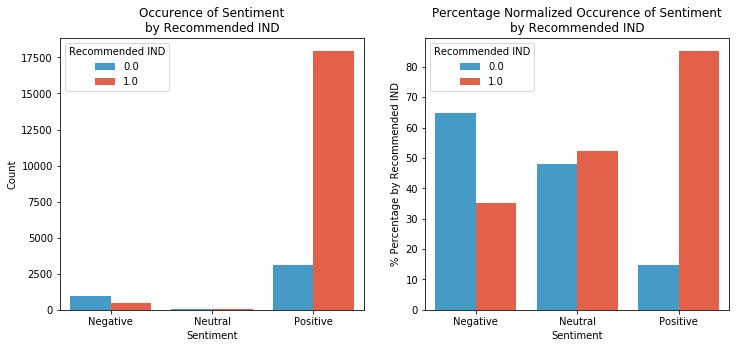

In [63]:
huevar = "Recommended IND"
xvar = "Sentiment"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

**Interpretation:**
Recommended is a variable that clearly indicates positive sentiment in the review.

In [64]:
df.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,767,33,Unknown,Absolutely wonderful - silky and sexy and comfortable,4,1.0,0.0,Initmates,Intimate,Intimates,Young Adult,0.8932,0.272,0.0,0.728,Positive
1,1080,34,Unknown,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1.0,4.0,General,Dresses,Dresses,Young Adult,0.9729,0.664,0.0,0.336,Positive


In [65]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Age Group', 'Polarity Score',
       'Neutral Score', 'Negative Score', 'Positive Score', 'Sentiment'],
      dtype='object')

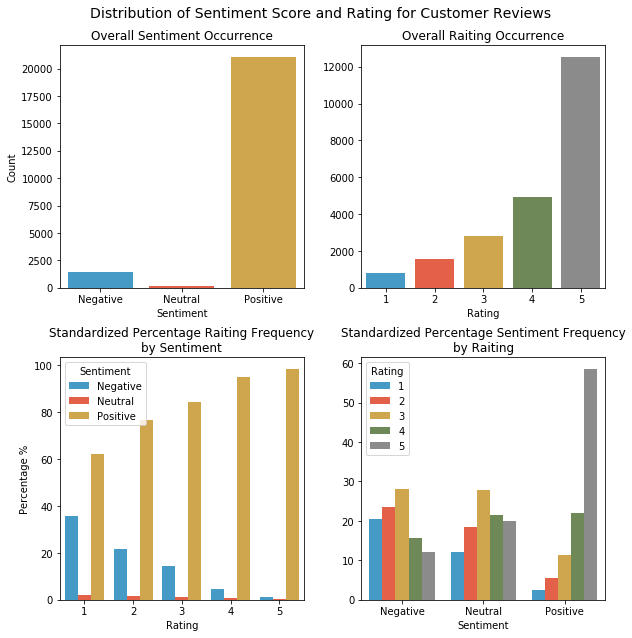

In [66]:
f, axes = plt.subplots(2,2, figsize=[9,9])
sns.countplot(x="Sentiment", data=df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Sentiment")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Sentiment Occurrence")

sns.countplot(x="Rating", data=df, ax=axes[0,1])
axes[0,1].set_xlabel("Rating")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Raiting Occurrence")

percentstandardize_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[1,0])
axes[1,0].set_xlabel("Rating")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Raiting Frequency\nby Sentiment")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Sentiment Frequency\nby Raiting")
axes[1,1].set_xlabel("Sentiment")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

**Code Interpretation:**
The last chunk, Visualization, plots the frequency of sentiments in a bar plot using matplotlib.

Interpretation:
Like the distribution of rating, most reviews have a positive sentiment. Unlike the distribution of rating, there is a lower occurrence of neutral rating is lower in proportion to the occurrence of medium ranged ratings.

The plot on the bottom right tells and interesting story. The rating of positive sentiment reviews have an increasing occurrence as the rating gets higher. But, but negative and neutral sentiment reviews, the highest occurrence rating has 3 rating, further emphasizing that people's motivation of assigning a review score of three are multiple.



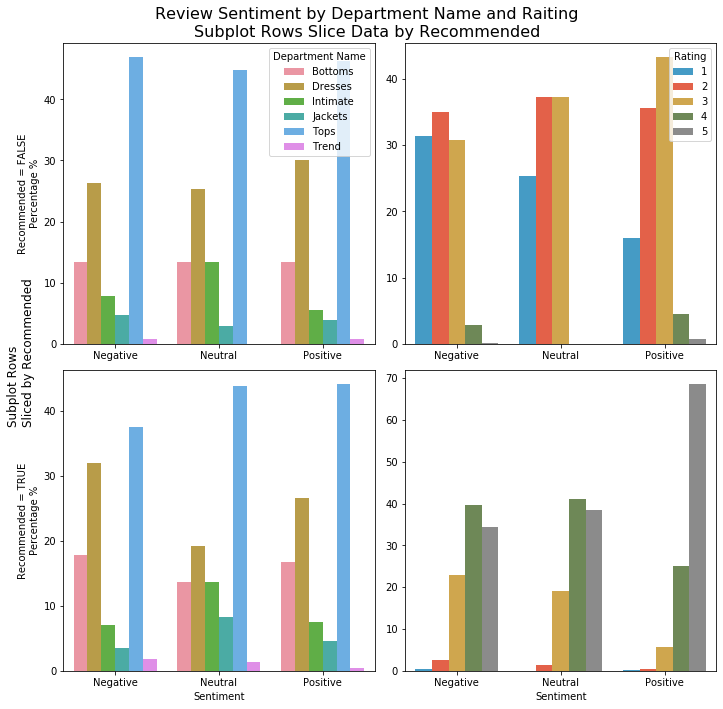

In [67]:
#Tweakable Variables (Note to Change Order Arguement if Xvar is changed)
xvar = "Sentiment"
huevar = "Department Name"
rowvar = "Recommended IND"

# Plot
f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df[df[rowvar] == x],
                 ax=axes[i,0], order=["Negative","Neutral","Positive"])
    percentstandardize_barplot(x=xvar,y="Percentage", hue="Rating",data=df[df[rowvar] == x],
                 ax=axes[i,1], order=["Negative","Neutral","Positive"])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
axes[1,0].set_ylabel("Recommended = TRUE\nPercentage %")
axes[1,1].set_title("")

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle("Review Sentiment by Department Name and Raiting\nSubplot Rows Slice Data by Recommended", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

**How to Interpret:**

In this plot, the upper and lower rows use the same variables, but the upper row is for non-recommended reviews, while the bottom row is for recommended reviews. This enables use to explore the nature of recommended reviews in terms of the mood of the writing, as well as the rating assigned by the customer.

**Interpretation:**

While the distribution of departments does not seem to change depending on status of recommendation, rating is almost entirely inverted. My previous theory that recommended reviews hold more criticizing weight does not hold up in this case since recommended reviews have a highly positive sentiment occurrence.

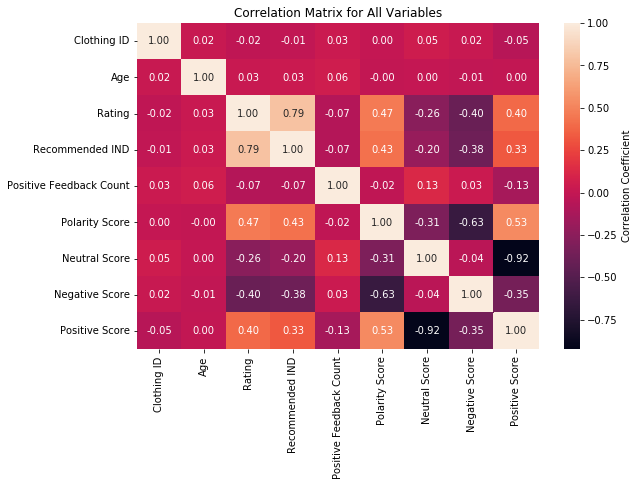

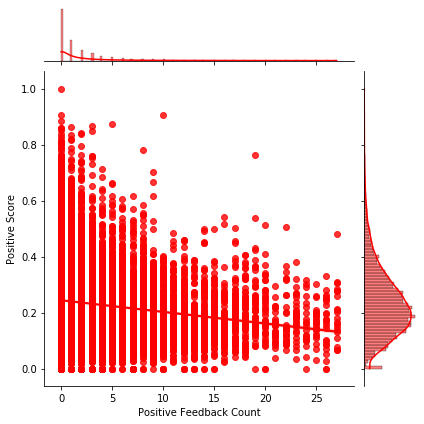

In [68]:
# Plotting Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(df.corr(), annot=True,
                 fmt=".2f",cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title("Correlation Matrix for All Variables")
plt.show()

# Sentiment Positivity Score by Positive Feedback Count
ax = sns.jointplot(x= df["Positive Feedback Count"], y=df["Positive Score"], kind='reg', color='r')
plt.show()

**Interpretation:**

Interestingly, there appears to be a substantial negative correlation between Positive Feedback Count and Positive Score, which suggests that the most acclaimed reviews on the platform are probably in the form on constructive criticism, rather than outright positivity.

# Word Distribution and Word Cloud

In [69]:
stopwords = set(STOPWORDS)
size = (10,7)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

**Code Explanation:**

This code creates the word cloud visualization function. This function’s mathematical processes are hidden, since it does not explicitly state that it determines the frequency occurrence of each word in relation to the entire dictionary of words. Within the function, the Setting Function Parameter section creates the graphic structure using matplotlib. Then the text is formatted, and the word frequency is determined. Finally, the matplotlib structure is filled with words, where the larger the word size, the higher the word occurrence.

**Visualize Titles**

In [70]:
#df['Class Name'].value_counts()

In [71]:
df["Title"].head()

0                    Unknown
1                    Unknown
2    Some major design flaws
3           My favorite buy!
4           Flattering shirt
Name: Title, dtype: object

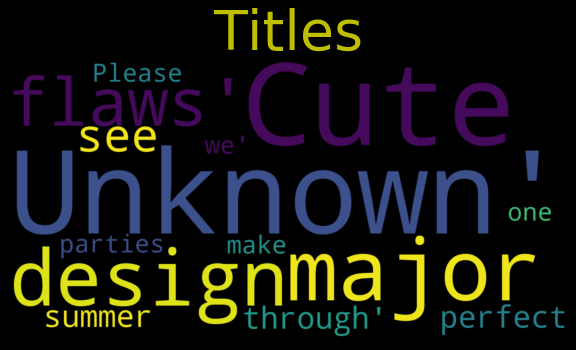

In [72]:
# Modify Stopwords to Exclude Class types, suchs as "dress"

### extracting the word cloud from title columns
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= df.Title[df.Title.notnull()].astype(str).values,
      title="Titles",
      stopwords= new_stop,
      size = (7,4))

**Visualize Reviews**

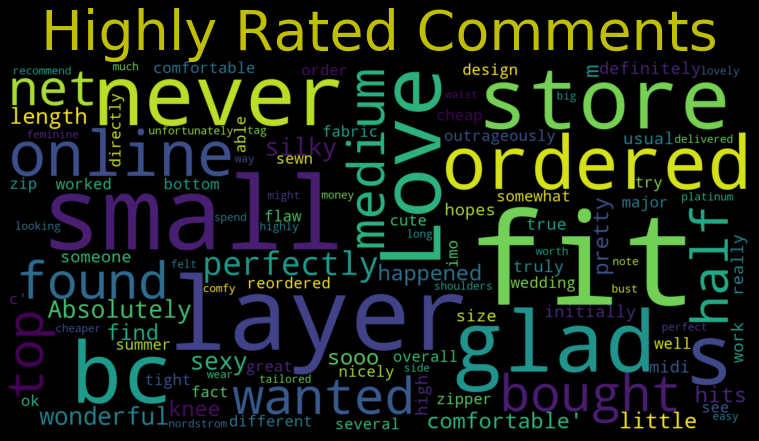

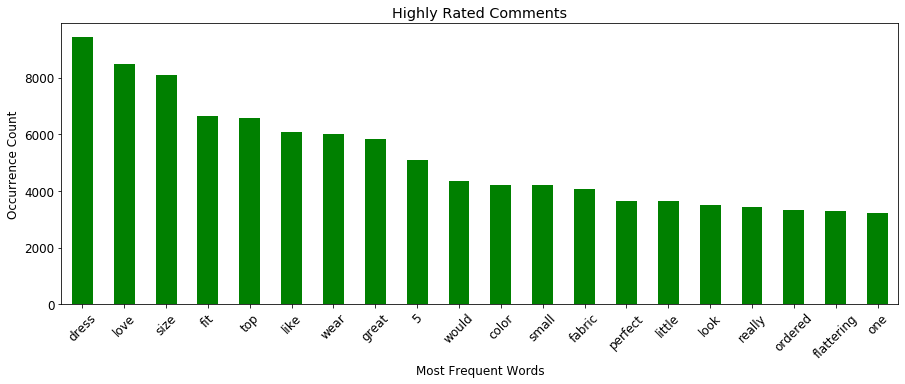

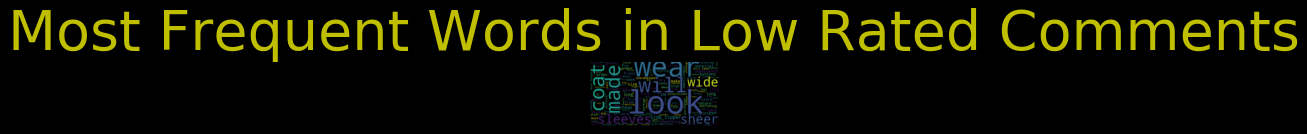

In [73]:
# Highly Raited
title ="Highly Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) >= 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

# Bar Chart
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurrence Count")
plt.xlabel("Most Frequent Words")
plt.show()

# Low Raited
title ="Most Frequent Words in Low Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite", "skirt","shirt"])

# Cloud
cloud(temp.values, title= title, stopwords = new_stop)

**Code Interpretation:**

The central flaw of these word clouds is that they only show the distribution of individual words. This removes the context of the word, as well as disregard negative prefixes. In order to solve this problem I will utilize n-grams, which increases the size of observed values from one word to multiple words, enabling frequency counts to be conducted to word sequences. Although I would have prefered to visualize these findings through the use of Word Clouds, I was unable to program this in, thus leaving me with a simple table.

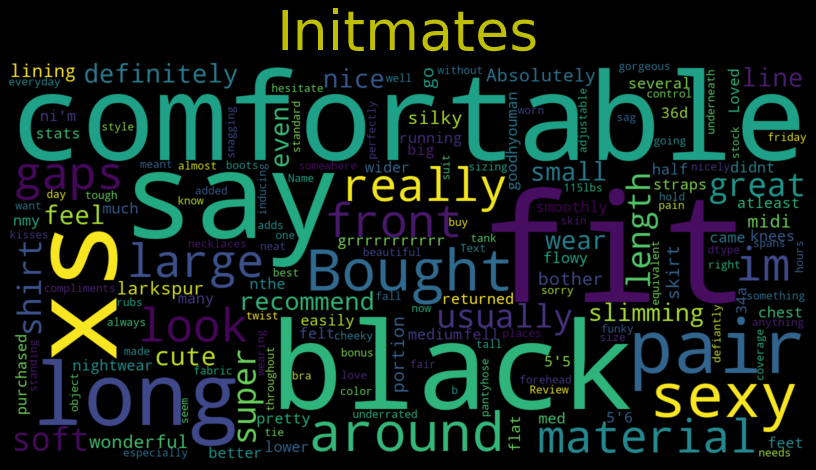

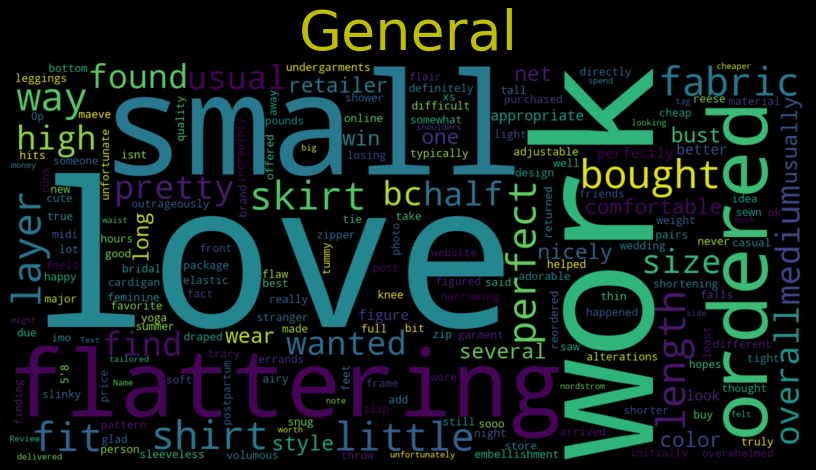

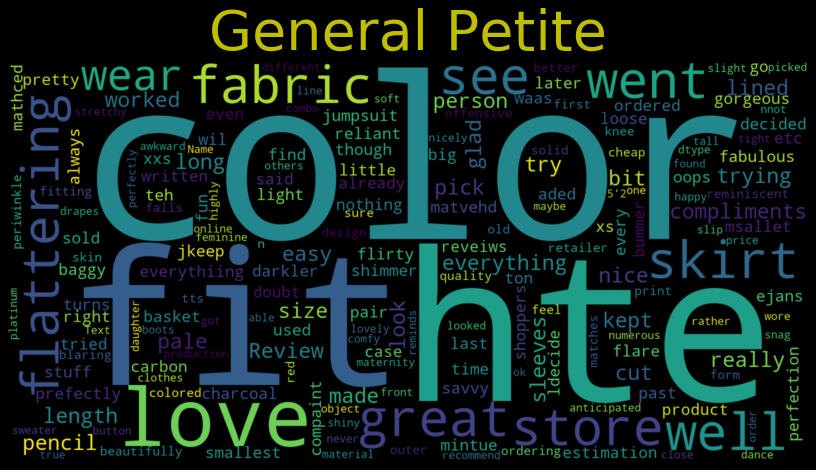

In [74]:
department_set = df["Department Name"][df["Department Name"].notnull()].unique()
division_set = df["Division Name"][df["Division Name"].notnull()].unique()
def cloud_by_category(data, category, subclass):
    """
    Function to create a wordcloud by class and subclass
    Category signifies the column variable
    Subclass refers to the specific value within the categorical variable
    """
    new_stop = set(STOPWORDS)
    new_stop.update([x.lower() for x in list(data["Class Name"][data["Class Name"].notnull()].unique())]
                   + [x.lower() for x in list(data["Department Name"][data["Department Name"].notnull()].unique())]
                   + ["dress", "petite", "jacket","top"])

    # Cloud
    cloud(text= data["Review Text"][data[category]== subclass],
          title="{}".format(subclass),
          stopwords= new_stop,
          size = (10,6))
    
# Plot
cloud_by_category(df, "Division Name", division_set[0])
cloud_by_category(df, "Division Name", division_set[1])
cloud_by_category(df, "Division Name", division_set[2])

**N Grams by Recommended Feature**

At this point, fit and product inconsistency strongly emerge as major topics in the reviews. From this information, I can infer that the dataset belongs to a online retailer, since brick and mortar stores have changing rooms to prevent this problem. The central themes in the product reviews brought to light by the n-grams are:

**Fit**: Whether the product’s advertised size actually corresponds to customer size and height.

**Love or Hate**: The customer's personal feelings towards the product.

**Complements**: The customer's social experience wearing the product.

**Product consistency**: Whether the product appears as advertised, lives up to quality expectations.

In [75]:
## Helper Functions
from nltk.util import ngrams
from collections import Counter
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(data, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(data),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurrence"]
        out = pd.concat([out, table], axis=1)
    return out

In [76]:
print("Non-Recommended Items")
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 0], gram=[1,2,3,4,5], length=30)

Non-Recommended Items


,1-Gram,Occurrence,2-Gram,Occurrence,3-Gram,Occurrence,4-Gram,Occurrence,5-Gram,Occurrence
0,dress,1976,wanted love,243,really wanted love,70,really wanted love dress,15,reference 5 7 125 lb,3
1,like,1780,going back,215,wanted love dress,65,looked like maternity top,10,going back wanted love dress,3
2,top,1572,looked like,187,really wanted like,40,really wanted like dress,9,reference measurements 38 30 40,3
3,would,1348,looks like,153,made look like,29,really wanted like top,9,photos reference measurements 38 30,3
4,fit,1327,really wanted,151,wanted love top,28,5 4 120 lbs,8,medium photos reference measurements 38,3
5,fabric,1245,made look,135,fit true size,28,really wanted love top,7,wearing medium photos reference measurements,3
6,size,1209,look like,126,ordered usual size,25,5 7 140 lbs,6,back really wanted like dress,3
7,back,1039,5 4,113,way much fabric,25,measurements 38 30 40,6,arm holes also cut low,3
8,look,965,felt like,109,sadly going back,24,going back really wanted,6,wanted top work looks cute,2
9,love,928,true size,104,like maternity top,23,would look better someone,5,sides much shorter front back,2


In [77]:
print("Recommended Items")
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 1], gram=[1,2,3,4,5], length=30)

Recommended Items


,1-Gram,Occurrence,2-Gram,Occurrence,3-Gram,Occurrence,4-Gram,Occurrence,5-Gram,Occurrence
0,dress,8591,true size,1243,fits true size,264,compliments every time wear,46,34b 26 waist 36 hips,27
1,love,8014,love dress,657,fit true size,192,26 waist 36 hips,32,get compliments every time wear,21
2,size,7560,5 4,622,received many compliments,163,34b 26 waist 36,28,5 2 currently 33 25,17
3,fit,5994,usually wear,588,runs true size,143,looks great skinny jeans,25,115 lbs 30 dd 26,15
4,top,5846,looks great,574,love love love,138,get compliments every time,23,115 lbs 30dd 26 5,13
5,wear,5678,fit perfectly,553,usually wear size,107,love love love dress,22,2 currently 33 25 37,13
6,great,5584,well made,531,every time wear,81,115 lbs 30 dd,22,lbs 30 dd 26 5,13
7,like,5367,love top,524,ordered usual size,79,usually wear size 4,21,5 5 tall 145 lbs,12
8,5,4678,5 3,488,small fit perfectly,72,5 4 120 lbs,20,5 tall 145 lbs 38,12
9,color,3887,fits perfectly,480,got many compliments,70,dress fits true size,18,lbs 30dd 26 5 waist,12


**Interpretation:**

In the negative reviews, customers express their disappointment in the product, stating that they “really wanted to love” the item. This signifies that the product did not live up to the customers expectations. This occurred for multiple reasons. “Order wear size” and “Usual wear size” suggest that the fit did not suit their typical universal body size. Perhaps if better product dimension information could be provided, then the likelihood of this negative response could decrease. Furthermore, perhaps the product platform could track the user’s size through previous purchase in order to warn customer for potential size conflict. Another form of negative review is in the disappointment in the product turnout. “Too much fabric” and “Looks nothing like” suggest inconsistency with online retail presentation and actual product. These reviews are especially destructive, since they damage the reputation of the store product quality, which is a online platforms biggest asset. On the other hand, positive reviews are void of criticism, and are preoccupied with confirming fit and sharing social experience with the clothing. “True Size”, “Fit Perfectly”, “Fit like a glove”, on top of the multiple 2-grams with customer’s height suggest that a large part of positive reviews are employed to confirm product fit according to certain size. The high occurrence of this review suggest that height and size is usually a big issue, which this retail managed to consistently satisfy. “Received many compliments”, “Look forward to wearing”, “Everytime I wear”, “Looks great with jeans” are all comments which reflect the customer's experience wearing the product out in public. This not only express the relevance of trendy, jaw dropping fashion for customers in a social context, but also suggests that the product review are a highly social space, in which customers not only talk with the retailer, but with the other customers as well.

**Supervised Learning**
Supervised learning requires features (independent variable) and a label (dependent variable). The Formatting section does just this by creating a tuple with the comment and customer rating label. Currently the independent variable is the entire comment. However, in order to the Naïve Bayes Algorithm to work, each word must be treated as a variable. Instead of utilizing sequential words, the model notes which words are present out of the entire dictionary of words available in the comments corpus. In order to reduce computational intensity, only the top 5000 most common words will be considered, instead of the 9000 unique words in the corpus. The find_features function does just this by checking the presence of words for a piece of text against word_features, a variable created earlier which includes the top 5000 most common words used by customers in this dataset. The Apply Function to Data section applies the find_features function to each individual customer review using a loop, while also retaining each review’s label.

In [78]:
df['tokenized'] = df["Review Text"].astype(str).str.lower() # Turn into lower case text
df['tokenized'] = df.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # Apply tokenize to each row
df['tokenized'] = df['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # Remove stopwords from each row
df['tokenized'] = df['tokenized'].apply(lambda x: [ps.stem(w) for w in x]) # Apply stemming to each row
all_words = nltk.FreqDist(preprocessing(df['Review Text'])) # Calculate word occurrence from whole block of text

vocab_count = 200
word_features= list(all_words.keys())[:vocab_count] # 2000 most recurring unique words
print("Number of words columns (One Hot Encoding): {}".format(len(all_words)))

Number of words columns (One Hot Encoding): 14034


In [79]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,tokenized
0,767,33,Unknown,Absolutely wonderful - silky and sexy and comfortable,4,1.0,0.0,Initmates,Intimate,Intimates,Young Adult,0.8932,0.272,0.000,0.728,Positive,"[absolut, wonder, silki, sexi, comfort]"
1,1080,34,Unknown,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1.0,4.0,General,Dresses,Dresses,Young Adult,0.9729,0.664,0.000,0.336,Positive,"[love, dress, sooo, pretti, happen, find, store, glad, bc, never, would, order, onlin, bc, petit, bought, petit, 5, 8, love, length, hit, littl, knee, would, definit, true, midi, someon, truli, petit]"
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0.0,0.0,General,Dresses,Dresses,Adult,0.9427,0.792,0.027,0.181,Positive,"[high, hope, dress, realli, want, work, initi, order, petit, small, usual, size, found, outrag, small, small, fact, could, zip, reorder, petit, medium, ok, overal, top, half, comfort, fit, nice, bottom, half, tight, layer, sever, somewhat, cheap, net, layer, imo, major, design, flaw, net, layer, sewn, directli, zipper, c]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1.0,0.0,General Petite,Bottoms,Pants,Adult,0.5727,0.340,0.226,0.434,Positive,"[love, love, love, jumpsuit, fun, flirti, fabul, everi, time, wear, get, noth, great, compliment]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1.0,6.0,General,Tops,Blouses,Adult,0.9291,0.700,0.000,0.300,Positive,"[shirt, flatter, due, adjust, front, tie, perfect, length, wear, leg, sleeveless, pair, well, cardigan, love, shirt]"


## Converting Text to a Model-able format: One Hot Encoding

In [80]:
# Tuple
labtext= list(zip(df.tokenized, (df["Recommended IND"]))) 

# Function to create model features
# for each review, records which unique words out of the whole text body are present
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features
# Apply function to data
featuresets = [(find_features(text), LABEL) for (text, LABEL) in labtext]
len(featuresets)

# Train/Test
training_set = featuresets[:15000]
testing_set = featuresets[15000:]

## Naive Bayes

Independent Variable: Word choices in Reviews
Dependent Variable: Whether or not review was Recommended
Supervised learning is typically employed to make predictions about the future. However, some simple models may also be opened up to offer some insight. Naive Bayes is a probabilistic model which depends on Bayes theorem to compute the probability of a word's category by looking at its occurrence over the different classes. Since this model looks at both good and bad reviews, it is able to extract the one-gram tokens which best polarize the categories. Using this model, I could potentially predict the positive or negative sentiment of unlabelled reviews.

In [81]:
# Posterior = prior_occurrence * likelihood / evidence
classifier = nltk.NaiveBayesClassifier.train(training_set)

# Output
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
print(classifier.show_most_informative_features(40))

Classifier accuracy percent: 82.48328307329224
Most Informative Features
                   cheap = True              0.0 : 1.0    =     12.3 : 1.0
                    glad = True              1.0 : 0.0    =      5.4 : 1.0
                  bummer = True              0.0 : 1.0    =      5.0 : 1.0
                     net = True              0.0 : 1.0    =      4.6 : 1.0
                    idea = True              0.0 : 1.0    =      4.4 : 1.0
                  pencil = True              1.0 : 0.0    =      4.3 : 1.0
                 perfect = True              1.0 : 0.0    =      3.8 : 1.0
                charcoal = True              1.0 : 0.0    =      3.7 : 1.0
                 shimmer = True              1.0 : 0.0    =      3.7 : 1.0
                     fun = True              1.0 : 0.0    =      3.4 : 1.0
                   later = True              1.0 : 0.0    =      3.0 : 1.0
                    sooo = True              0.0 : 1.0    =      2.6 : 1.0
                     ton = 

***Key Findings¶***

Product recommendation and Product rating are used for different purposes.

Recommended is a strong indicator for positive sentiment in the review.

Rating is more convoluted, where rating around 3 are hopeful reviews with constructive criticism of the product.

In [82]:
!pip install scikit-plot

In [83]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
#import scikitplot as skplt
#import eli5

In [84]:
df.head(2)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,tokenized
0,767,33,Unknown,Absolutely wonderful - silky and sexy and comfortable,4,1.0,0.0,Initmates,Intimate,Intimates,Young Adult,0.8932,0.272,0.0,0.728,Positive,"[absolut, wonder, silki, sexi, comfort]"
1,1080,34,Unknown,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1.0,4.0,General,Dresses,Dresses,Young Adult,0.9729,0.664,0.0,0.336,Positive,"[love, dress, sooo, pretti, happen, find, store, glad, bc, never, would, order, onlin, bc, petit, bought, petit, 5, 8, love, length, hit, littl, knee, would, definit, true, midi, someon, truli, petit]"


In [85]:
#vect = TfidfVectorizer()
ls = []
for i in df["tokenized"]:
    ls.append(' '.join(i))
    
#ls.append(' '.join(i) for i in df['tokenized'])

In [86]:
df['review_text_altered'] = ls 

In [87]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,tokenized,review_text_altered
0,767,33,Unknown,Absolutely wonderful - silky and sexy and comfortable,4,1.0,0.0,Initmates,Intimate,Intimates,Young Adult,0.8932,0.272,0.000,0.728,Positive,"[absolut, wonder, silki, sexi, comfort]",absolut wonder silki sexi comfort
1,1080,34,Unknown,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1.0,4.0,General,Dresses,Dresses,Young Adult,0.9729,0.664,0.000,0.336,Positive,"[love, dress, sooo, pretti, happen, find, store, glad, bc, never, would, order, onlin, bc, petit, bought, petit, 5, 8, love, length, hit, littl, knee, would, definit, true, midi, someon, truli, petit]",love dress sooo pretti happen find store glad bc never would order onlin bc petit bought petit 5 8 love length hit littl knee would definit true midi someon truli petit
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0.0,0.0,General,Dresses,Dresses,Adult,0.9427,0.792,0.027,0.181,Positive,"[high, hope, dress, realli, want, work, initi, order, petit, small, usual, size, found, outrag, small, small, fact, could, zip, reorder, petit, medium, ok, overal, top, half, comfort, fit, nice, bottom, half, tight, layer, sever, somewhat, cheap, net, layer, imo, major, design, flaw, net, layer, sewn, directli, zipper, c]",high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1.0,0.0,General Petite,Bottoms,Pants,Adult,0.5727,0.340,0.226,0.434,Positive,"[love, love, love, jumpsuit, fun, flirti, fabul, everi, time, wear, get, noth, great, compliment]",love love love jumpsuit fun flirti fabul everi time wear get noth great compliment
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1.0,6.0,General,Tops,Blouses,Adult,0.9291,0.700,0.000,0.300,Positive,"[shirt, flatter, due, adjust, front, tie, perfect, length, wear, leg, sleeveless, pair, well, cardigan, love, shirt]",shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt


In [88]:
vect = TfidfVectorizer()
vect.fit(df["review_text_altered"])
X = vect.transform(df["review_text_altered"])

In [109]:
df.shape

(22627, 18)

In [110]:
X.shape

(22627, 9776)

In [89]:
vect

TfidfVectorizer()

In [90]:
y = df["Recommended IND"].copy()

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=23, stratify=y)

In [91]:
X_train

<18101x9776 sparse matrix of type '<class 'numpy.float64'>'
	with 464679 stored elements in Compressed Sparse Row format>

In [92]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print("Train Set Accuracy: {}".format(metrics.accuracy_score(model.predict(X_train), y_train)))
print("Train Set ROC: {}\n".format(metrics.roc_auc_score(model.predict(X_train), y_train)))

print("Validation Set Accuracy: {}".format(metrics.accuracy_score(model.predict(X_valid), y_valid)))
print("Validation Set ROC: {}".format(metrics.roc_auc_score(model.predict(X_valid), y_valid)))

Train Set Accuracy: 0.9063587647091321
Train Set ROC: 0.8811757114983764

Validation Set Accuracy: 0.8870967741935484
Validation Set ROC: 0.840334996290675


In [94]:
y_list = model.predict_proba(X_valid)

In [111]:
y_list[:5]

array([[0.04388651, 0.95611349],
       [0.0104329 , 0.9895671 ],
       [0.14869318, 0.85130682],
       [0.28305661, 0.71694339],
       [0.09087723, 0.90912277]])

In [93]:
print(metrics.classification_report(model.predict(X_valid), y_valid))

              precision    recall  f1-score   support

         0.0       0.53      0.78      0.63       555
         1.0       0.97      0.90      0.93      3971

    accuracy                           0.89      4526
   macro avg       0.75      0.84      0.78      4526
weighted avg       0.91      0.89      0.90      4526



In [ ]:
### Predicting probabilities of logistic regression for entire data. 

In [112]:
y_prob = model.predict_proba(X)
lst = y_prob.tolist()

proba = []
for inner in lst:
    proba.append(inner[1])


In [115]:
df["logistic_Probability"] = proba

In [116]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age Group,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,tokenized,review_text_altered,logistic_Probability
0,767,33,Unknown,Absolutely wonderful - silky and sexy and comfortable,4,1.0,0.0,Initmates,Intimate,Intimates,Young Adult,0.8932,0.272,0.000,0.728,Positive,"[absolut, wonder, silki, sexi, comfort]",absolut wonder silki sexi comfort,0.985324
1,1080,34,Unknown,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1.0,4.0,General,Dresses,Dresses,Young Adult,0.9729,0.664,0.000,0.336,Positive,"[love, dress, sooo, pretti, happen, find, store, glad, bc, never, would, order, onlin, bc, petit, bought, petit, 5, 8, love, length, hit, littl, knee, would, definit, true, midi, someon, truli, petit]",love dress sooo pretti happen find store glad bc never would order onlin bc petit bought petit 5 8 love length hit littl knee would definit true midi someon truli petit,0.941208
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0.0,0.0,General,Dresses,Dresses,Adult,0.9427,0.792,0.027,0.181,Positive,"[high, hope, dress, realli, want, work, initi, order, petit, small, usual, size, found, outrag, small, small, fact, could, zip, reorder, petit, medium, ok, overal, top, half, comfort, fit, nice, bottom, half, tight, layer, sever, somewhat, cheap, net, layer, imo, major, design, flaw, net, layer, sewn, directli, zipper, c]",high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer imo major design flaw net layer sewn directli zipper c,0.447869
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1.0,0.0,General Petite,Bottoms,Pants,Adult,0.5727,0.340,0.226,0.434,Positive,"[love, love, love, jumpsuit, fun, flirti, fabul, everi, time, wear, get, noth, great, compliment]",love love love jumpsuit fun flirti fabul everi time wear get noth great compliment,0.995930
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1.0,6.0,General,Tops,Blouses,Adult,0.9291,0.700,0.000,0.300,Positive,"[shirt, flatter, due, adjust, front, tie, perfect, length, wear, leg, sleeveless, pair, well, cardigan, love, shirt]",shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt,0.989622


In [117]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Age Group', 'Polarity Score',
       'Neutral Score', 'Negative Score', 'Positive Score', 'Sentiment',
       'tokenized', 'review_text_altered', 'logistic_Probability'],
      dtype='object')

### Final Modelling

In [121]:
final_frame = df[['Age','Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name','Polarity Score','logistic_Probability']]

In [153]:
final_frame = df[['Rating','Recommended IND', 'Positive Feedback Count','Polarity Score','logistic_Probability']]

In [154]:
final_frame.head()

,Rating,Recommended IND,Positive Feedback Count,Polarity Score,logistic_Probability
0,4,1.0,0.0,0.8932,0.985324
1,5,1.0,4.0,0.9729,0.941208
2,3,0.0,0.0,0.9427,0.447869
3,5,1.0,0.0,0.5727,0.995930
4,5,1.0,6.0,0.9291,0.989622


In [155]:
ff_2 = pd.get_dummies(data = final_frame)
print(ff_2.shape)
ff_2.head()

(22627, 5)


,Rating,Recommended IND,Positive Feedback Count,Polarity Score,logistic_Probability
0,4,1.0,0.0,0.8932,0.985324
1,5,1.0,4.0,0.9729,0.941208
2,3,0.0,0.0,0.9427,0.447869
3,5,1.0,0.0,0.5727,0.995930
4,5,1.0,6.0,0.9291,0.989622


In [156]:
ff_2["Positive Feedback Count"].fillna(0, inplace = True)
#df_new_2.isnull().sum()

In [157]:
X = ff_2.drop("Recommended IND", axis='columns')
y = ff_2["Recommended IND"]
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

Index(['Rating', 'Positive Feedback Count', 'Polarity Score',
       'logistic_Probability'],
      dtype='object')


In [158]:
X_train.head()

,Rating,Positive Feedback Count,Polarity Score,logistic_Probability
19013,3,9.0,0.8903,0.675385
565,1,12.0,0.9439,0.460284
20013,3,1.0,0.1406,0.442140
22215,5,2.0,0.9298,0.979666
21805,3,0.0,0.8605,0.852773


In [159]:
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

1.0    0.816202
0.0    0.183798
Name: Recommended IND, dtype: float64
1.0    0.824716
0.0    0.175284
Name: Recommended IND, dtype: float64


In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay

# Decision Tree Classifier

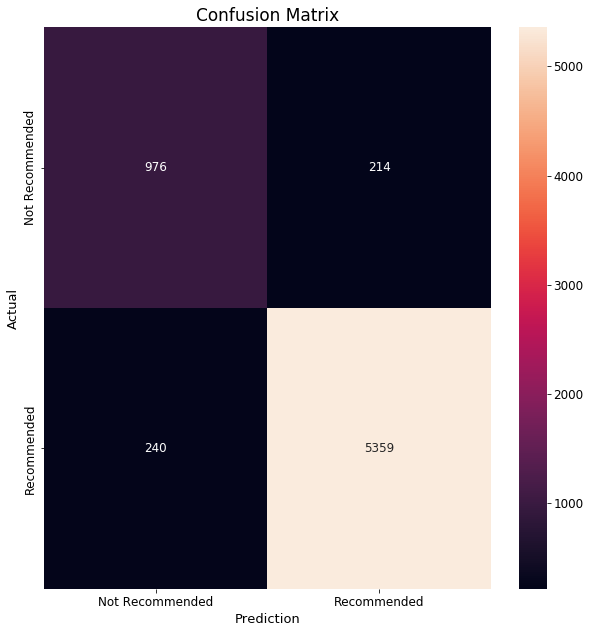

Accuracy   : 0.9331271173957874
Precision : 0.9616005741970214
Recall    : 0.9571352027147705
F1-score  : 0.9593626924453993


In [161]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
y_pred_list = list(y_pred)
y_true_list = list(y_test)

cm = confusion_matrix(y_true_list,y_pred_list)

#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Not Recommended','Recommended'],
            yticklabels=['Not Recommended','Recommended'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

# Logitstic Regression

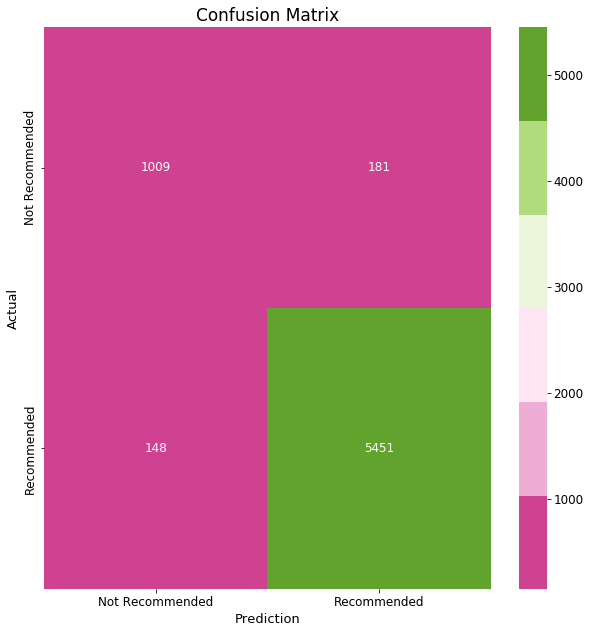

Accuracy   : 0.9515392546766829
Precision : 0.9678622159090909
Recall    : 0.9735667083407752
F1-score  : 0.9707060813818895


In [162]:
lr= LogisticRegression(random_state=16)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
y_pred_list = list(y_pred)
y_true_list = list(y_test)

cm = confusion_matrix(y_true_list,y_pred_list)
colormap = sns.color_palette("PiYG") 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            cmap=colormap,
            fmt='g', 
            xticklabels=['Not Recommended','Recommended'],
            yticklabels=['Not Recommended','Recommended'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

# Support Vector Machine

Accuracy: 0.9515392546766829


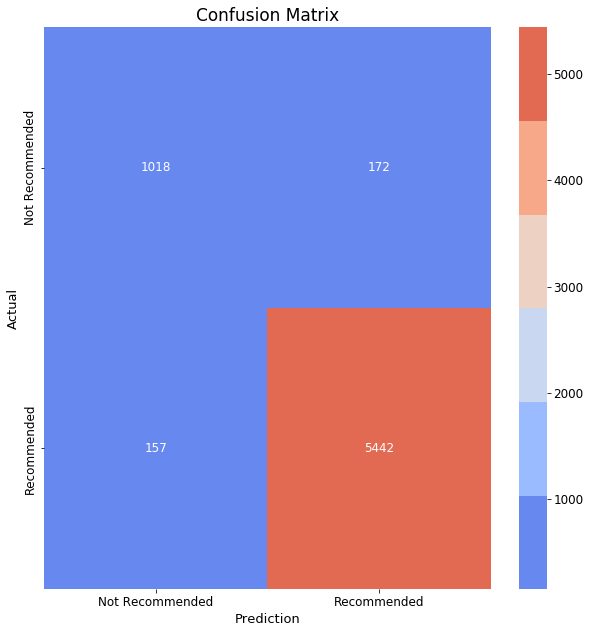

Accuracy   : 0.9515392546766829
Precision : 0.9693623085144282
Recall    : 0.971959278442579
F1-score  : 0.9706590564523321


In [163]:
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


y_pred_list = list(y_pred)
y_true_list = list(y_test)

cm = confusion_matrix(y_true_list,y_pred_list)
colormap = sns.color_palette("coolwarm") 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            cmap=colormap,
            fmt='g', 
            xticklabels=['Not Recommended','Recommended'],
            yticklabels=['Not Recommended','Recommended'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

# Naive Bayes

Accuracy: 0.933716305788776


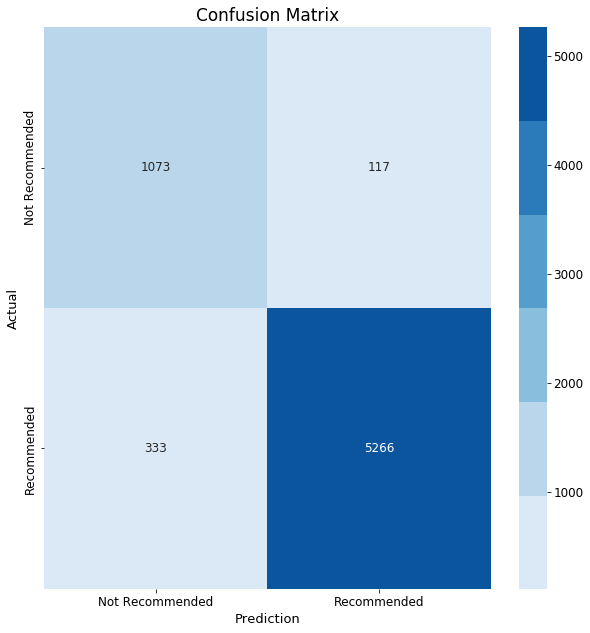

Accuracy   : 0.933716305788776
Precision : 0.9782649080438417
Recall    : 0.9405250937667441
F1-score  : 0.9590238572209069


In [164]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_pred_list = list(y_pred)
y_true_list = list(y_test)

cm = confusion_matrix(y_true_list,y_pred_list)
colormap = sns.color_palette("Blues") 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            cmap=colormap,
            fmt='g', 
            xticklabels=['Not Recommended','Recommended'],
            yticklabels=['Not Recommended','Recommended'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)

## Random Forest Classification

Accuracy: 0.9488879069082339


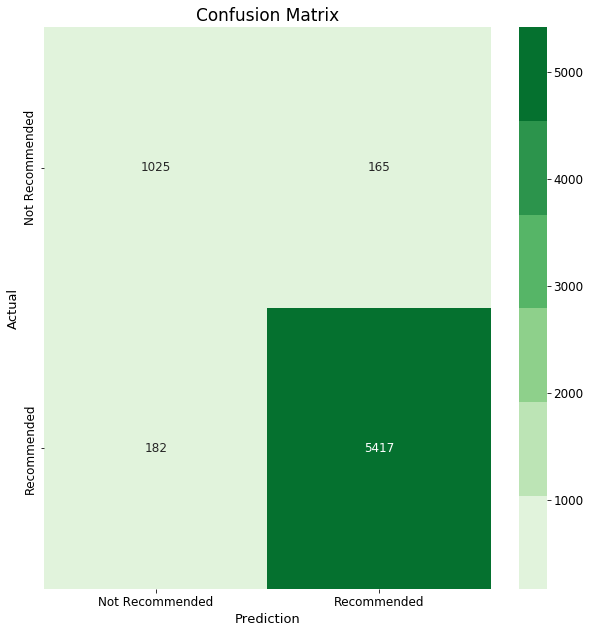

Accuracy   : 0.9488879069082339
Precision : 0.9704407022572554
Recall    : 0.9674941953920343
F1-score  : 0.9689652088364189


In [165]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



y_pred_list = list(y_pred)
y_true_list = list(y_test)

cm = confusion_matrix(y_true_list,y_pred_list)
colormap = sns.color_palette("Greens") 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            cmap=colormap,
            fmt='g', 
            xticklabels=['Not Recommended','Recommended'],
            yticklabels=['Not Recommended','Recommended'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)
precision = precision_score(y_test, y_pred)
print("Precision :", precision)
recall = recall_score(y_test, y_pred)
print("Recall    :", recall)
F1_score = f1_score(y_test, y_pred)
print("F1-score  :", F1_score)